# Data preprocessing

---


In [58]:
DATA_PATH = r'..\data\processed\04-final_data_v2.pkl'
OUTPUT_DATA_PATH = r'..\data\processed\05-final_data_after_Feature-E.pkl'


list_columns = ['Key_languages', 'Databases', 'Web_frames', 'Platforms']

specified_columns = ['EdLevel', 'experanse_years']

## Importing


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

import plotly
import plotly.graph_objects as go
import plotly.express as px


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.compose import ColumnTransformer

# Set the maximum number of rows and columns to display
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
# Functions
def encoding_list_col(df):
    # Perform one-hot encoding on list columns

    for column in list_columns:
        # Create a list of unique values from all lists in the column
        unique_values = set(
            value for sublist in df[column] for value in sublist)

        # Create binary features for each unique value
        for value in unique_values:
            df[f"{column}_{value}"] = df[column].apply(
                lambda x: int(value in x))

    # Drop the original list columns
    df = df.drop(columns=list_columns)

    # Rearrange columns to move specified columns to the end

    df = pd.concat([df.drop(columns=specified_columns),
                    df[specified_columns]], axis=1)

    return df

In [4]:
df = pd.read_pickle(DATA_PATH)

# Feature Engineering


In [5]:
df.head()

,Key_languages,Databases,Platforms,Web_frames,EdLevel,experanse_years,DevType
0,"[GDScript, Bash/Shell (all shells), Rust, Java...",[Supabase],"[Amazon Web Services (AWS), Netlify, Vercel]","[Next.js, React, Remix, Vue.js]",Bachelor's,9.0,Executive
1,"[Go, Rust, OCaml, Haskell, Bash/Shell (all she...",[Don't have],"[Amazon Web Services (AWS), Google Cloud, Open...",[Don't have],Bachelor's,23.0,Back-end Developer
2,"[Ruby, JavaScript, TypeScript, SQL, PHP, HTML/...","[PostgreSQL, Redis]","[Cloudflare, Heroku]","[Node.js, React, Ruby on Rails, Vue.js, WordPr...",Bachelor's,7.0,Front-end Developer
3,"[Rust, JavaScript, Python, HTML/CSS, TypeScript]","[BigQuery, Elasticsearch, MongoDB, PostgreSQL]","[Amazon Web Services (AWS), Firebase, Heroku, ...","[Express, Gatsby, NestJS, Next.js, Node.js, Re...",Bachelor's,4.0,Full-stack Developer
4,"[Go, Ruby, Rust, JavaScript, TypeScript, SQL, ...","[BigQuery, Cloud Firestore, PostgreSQL, Redis]","[Amazon Web Services (AWS), Cloudflare, Google...","[Angular, Express, NestJS, Node.js]",Some College/University,21.0,Back-end Developer


We will use clustering to form groups of skills


In [6]:
df = encoding_list_col(df)

C:\Users\xobed\AppData\Local\Temp\ipykernel_23260\2221178282.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{column}_{value}"] = df[column].apply(
C:\Users\xobed\AppData\Local\Temp\ipykernel_23260\2221178282.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{column}_{value}"] = df[column].apply(
C:\Users\xobed\AppData\Local\Temp\ipykernel_23260\2221178282.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [7]:
df.head()

,DevType,Key_languages_Perl,Key_languages_Fortran,Key_languages_Prolog,Key_languages_Zig,Key_languages_VBA,Key_languages_Crystal,Key_languages_OCaml,Key_languages_Don't have,Key_languages_JavaScript,...,Platforms_Firebase,Platforms_Digital Ocean,Platforms_Vercel,Platforms_OpenStack,Platforms_Hetzner,Platforms_Fly.io,Platforms_Oracle Cloud Infrastructure (OCI),Platforms_Colocation,EdLevel,experanse_years
0,Executive,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,Bachelor's,9.0
1,Back-end Developer,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,Bachelor's,23.0
2,Front-end Developer,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Bachelor's,7.0
3,Full-stack Developer,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,Bachelor's,4.0
4,Back-end Developer,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Some College/University,21.0


In [8]:
skills_df = df.drop(['DevType', 'EdLevel', 'experanse_years'], axis=1)

In [9]:
skills_df

,Key_languages_Perl,Key_languages_Fortran,Key_languages_Prolog,Key_languages_Zig,Key_languages_VBA,Key_languages_Crystal,Key_languages_OCaml,Key_languages_Don't have,Key_languages_JavaScript,Key_languages_Lua,...,Platforms_Heroku,Platforms_Cloudflare,Platforms_Firebase,Platforms_Digital Ocean,Platforms_Vercel,Platforms_OpenStack,Platforms_Hetzner,Platforms_Fly.io,Platforms_Oracle Cloud Infrastructure (OCI),Platforms_Colocation
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67116,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
67117,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
67118,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
67119,0,0,0,0,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,0,0


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_skills = scaler.fit_transform(skills_df)

we don't want to make decomposition in the skills but we want make that on the number of response for each skill so , will be make transpose of data


In [11]:
scaled_skills.T.shape

(144, 64478)

In [12]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_sk_data = pca_model.fit_transform(scaled_skills.T)

In [13]:
pca_model.explained_variance_ratio_.sum()

0.0705735279551021

<Axes: >

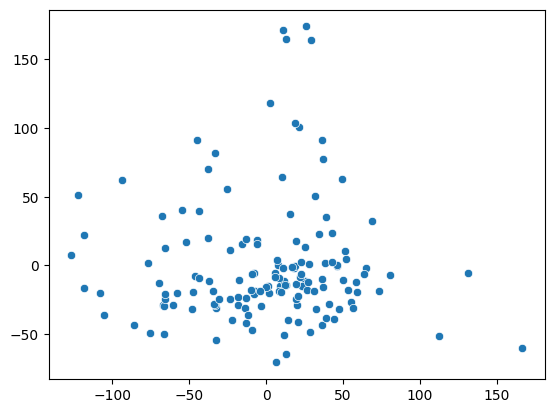

In [14]:
sns.scatterplot(x=pca_sk_data[:, 0], y=pca_sk_data[:, 1])

In [15]:
pca_sk_df = pd.DataFrame(pca_sk_data,  index=skills_df.columns)

In [16]:
fig = px.scatter(x=pca_sk_df[0], y=pca_sk_df[1], text=pca_sk_df.index)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=2000, title_text='TSNE')
fig.show()

In [17]:
from sklearn.manifold import TSNE

tsne_skills = TSNE(n_components=2, perplexity=5, n_iter=5000, random_state=42)

tsna_sk_data = tsne_skills.fit_transform(scaled_skills.T)

In [18]:
tsna_sk_data.shape

(144, 2)

In [19]:
tsne_sk_df = pd.DataFrame(tsna_sk_data,  index=skills_df.columns)

<Axes: >

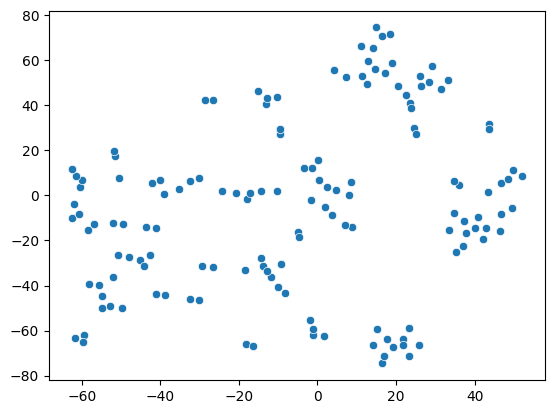

In [20]:
sns.scatterplot(x=tsna_sk_data[:, 0], y=tsna_sk_data[:, 1])

In [21]:
fig = px.scatter(x=tsne_sk_df[0], y=tsne_sk_df[1], text=tsne_sk_df.index)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=2000, title_text='TSNE')
fig.show()

the TSNE separates the classes better than PCA


# Clustring


In [22]:
from sklearn.cluster import KMeans

knn_model = KMeans(n_clusters=10, n_init='auto', random_state=42)

classes = knn_model.fit_predict(tsne_sk_df)

<Axes: >

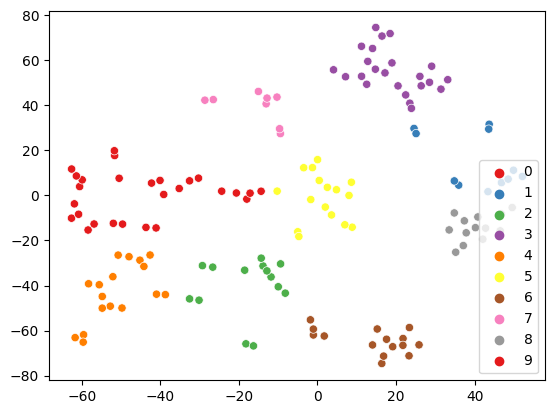

In [23]:
sns.scatterplot(x=tsna_sk_data[:, 0],
                y=tsna_sk_data[:, 1], hue=classes, palette='Set1')

## How many clusters are enough?


In [24]:
SSD = []

for k in range(2, 30):
    knn_model = KMeans(n_clusters=k, n_init='auto', random_state=42)

    knn_model.fit(tsne_sk_df)

    SSD.append(knn_model.inertia_)

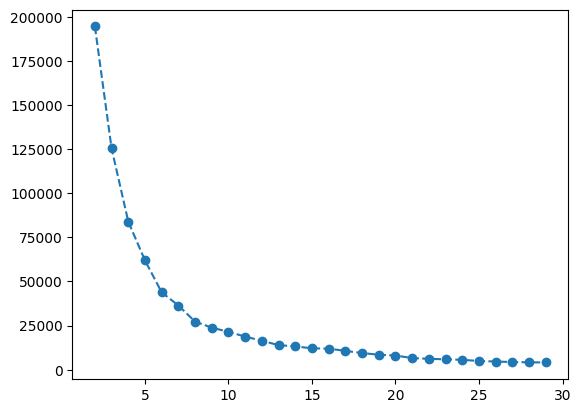

In [25]:
plt.plot(range(2, 30), SSD, '--o')

i will choose 14 cluster


<Axes: >

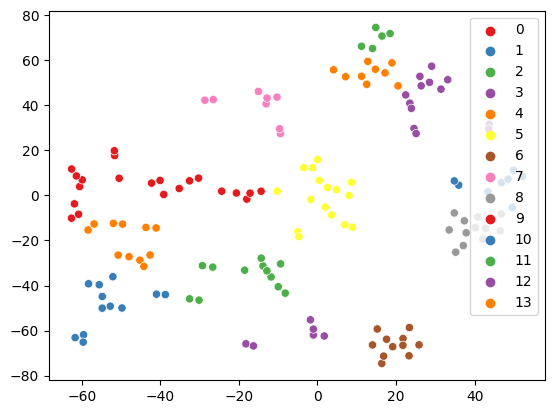

In [26]:
from sklearn.cluster import KMeans

knn_model = KMeans(n_clusters=14, n_init='auto', random_state=42)

classes = knn_model.fit_predict(tsne_sk_df)
sns.scatterplot(x=tsna_sk_data[:, 0],
                y=tsna_sk_data[:, 1], hue=classes, palette='Set1')

In [60]:
fig = px.scatter(x=tsne_sk_df[0], y=tsne_sk_df[1],
                 text=tsne_sk_df.index, color=classes)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=1900, title_text='TSNE')
fig.show()

In [28]:
classes.shape

(144,)

In [37]:
cluster_labels = ["skills_group_" + str(label)
                  for label in knn_model.labels_]

In [43]:
skills_clusters = tsne_sk_df.index.to_series().groupby(cluster_labels).apply(list)

In [44]:
for cluster, skills in skills_clusters.items():
    print(cluster)
    print(skills)

skills_group_0
['Key_languages_Crystal', 'Key_languages_OCaml', 'Key_languages_Erlang', 'Key_languages_Nim', 'Key_languages_Haskell', 'Key_languages_Ruby', 'Key_languages_Elixir', 'Web_frames_Elm', 'Web_frames_Ruby on Rails', 'Web_frames_Phoenix', 'Platforms_Fly.io']
skills_group_1
['Platforms_OVH', 'Platforms_Linode, now Akamai', 'Platforms_Scaleway', 'Platforms_Vultr', 'Platforms_Cloudflare', 'Platforms_Digital Ocean', 'Platforms_Hetzner', 'Platforms_Colocation']
skills_group_10
['Key_languages_Fortran', 'Key_languages_Assembly', 'Key_languages_C', 'Key_languages_C++', 'Key_languages_R', 'Key_languages_Julia', 'Key_languages_Cobol', 'Key_languages_MATLAB', 'Key_languages_SAS', "Databases_Don't have", "Web_frames_Don't have", "Platforms_Don't have"]
skills_group_11
['Web_frames_Deno', 'Web_frames_Svelte', 'Web_frames_Lit', 'Web_frames_Qwik', 'Web_frames_Solid.js']
skills_group_12
['Key_languages_VBA', 'Key_languages_Delphi', 'Key_languages_Visual Basic (.Net)', 'Databases_Microsoft Ac

In [54]:
# skills_df[['Web_frames_Deno', 'Web_frames_Svelte', 'Web_frames_Lit', 'Web_frames_Qwik', 'Web_frames_Solid.js']].sum(axis=1)

In [47]:
new_features = []

for cluster, skills in skills_clusters.items():
    cluster_sum = skills_df[skills].sum(axis=1)
    cluster_sum.name = cluster
    new_features.append(cluster_sum)

fe_clustered_skills = pd.concat(new_features, axis=1)

In [48]:
fe_clustered_skills

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
0,1,0,0,0,0,6,0,3,0,1,1,1,0,4
1,2,1,2,0,1,0,1,0,0,1,0,1,0,3
2,2,1,0,0,0,2,0,5,0,2,1,0,2,1
3,0,0,0,0,0,6,0,7,0,3,0,2,0,2
4,1,1,0,0,0,0,0,7,0,3,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67116,0,0,0,0,1,0,4,2,0,0,0,1,2,0
67117,0,1,2,0,3,0,4,7,0,1,6,0,10,1
67118,0,0,0,0,0,0,1,4,0,2,0,0,0,2
67119,0,1,1,1,0,2,2,10,0,1,1,2,3,2


In [56]:
fe_clustered_skills[['EdLevel', 'experanse_years', 'DevType']
                    ] = df[['EdLevel', 'experanse_years', 'DevType']]

In [57]:
fe_clustered_skills

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9,EdLevel,experanse_years,DevType
0,1,0,0,0,0,6,0,3,0,1,1,1,0,4,Bachelor's,9.0,Executive
1,2,1,2,0,1,0,1,0,0,1,0,1,0,3,Bachelor's,23.0,Back-end Developer
2,2,1,0,0,0,2,0,5,0,2,1,0,2,1,Bachelor's,7.0,Front-end Developer
3,0,0,0,0,0,6,0,7,0,3,0,2,0,2,Bachelor's,4.0,Full-stack Developer
4,1,1,0,0,0,0,0,7,0,3,1,3,0,3,Some College/University,21.0,Back-end Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67116,0,0,0,0,1,0,4,2,0,0,0,1,2,0,Bachelor's,8.0,Mobile Developer
67117,0,1,2,0,3,0,4,7,0,1,6,0,10,1,Master's,11.0,Full-stack Developer
67118,0,0,0,0,0,0,1,4,0,2,0,0,0,2,Bachelor's,22.0,Full-stack Developer
67119,0,1,1,1,0,2,2,10,0,1,1,2,3,2,Associate,5.0,Front-end Developer


---

save data


In [59]:
fe_clustered_skills.to_pickle(OUTPUT_DATA_PATH)